In [1]:
# Training Dataset

import pandas as pd

pizza = {'Diameter': [7, 9, 11, 15, 19],
         'N_Topping': [3, 2, 0, 1, 0],
         'Harga': [8, 10, 12, 16.5, 19]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,Diameter,N_Topping,Harga
0,7,3,8.0
1,9,2,10.0
2,11,0,12.0
3,15,1,16.5
4,19,0,19.0


In [2]:
# Testing Dataset

pizza = {'Diameter': [6, 7, 13, 16, 17], # features
         'N_Topping': [3, 1, 0, 0, 2],   # features
         'Harga': [9, 7.5, 15, 19, 12]}  # target

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,Diameter,N_Topping,Harga
0,6,3,9.0
1,7,1,7.5
2,13,0,15.0
3,16,0,19.0
4,17,2,12.0


In [3]:
# Preprocessing Dataset

import numpy as np

X_train = np.array(train_pizza_df[['Diameter', 'N_Topping']])  # Array 2 dimensi
y_train = np.array(train_pizza_df['Harga']) # Array 1 dimensi

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 7  3]
 [ 9  2]
 [11  0]
 [15  1]
 [19  0]]

y_train: [ 8.  10.  12.  16.5 19. ]


In [4]:
X_test = np.array(test_pizza_df[['Diameter', 'N_Topping']])
y_test = np.array(test_pizza_df['Harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 6  3]
 [ 7  1]
 [13  0]
 [16  0]
 [17  2]]

y_test: [ 9.   7.5 15.  19.  12. ]


In [7]:
# Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yg memungkinkan untuk menggunakan bbrapa explanatory variables

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()       # untuk membentuk objek modelnya
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}') 

r_squared: 0.5152800559087196


In [8]:
# Polynomial Regresson memodelkan hubungan antara independent variable x dan dependent variable y sebagai derajat polynomial dalam x

X_train = np.array(train_pizza_df['Diameter']).reshape(-1, 1)  # reshape digunakan utk mentransformasikan menjadi 2 dimensi
y_train = np.array(train_pizza_df['Harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 7]
 [ 9]
 [11]
 [15]
 [19]]

y_train: [ 8.  10.  12.  16.5 19. ]


In [9]:
# Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)             # degree atau derajat polynomial
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   7.  49.]
 [  1.   9.  81.]
 [  1.  11. 121.]
 [  1.  15. 225.]
 [  1.  19. 361.]]



In [10]:
# Training Model

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

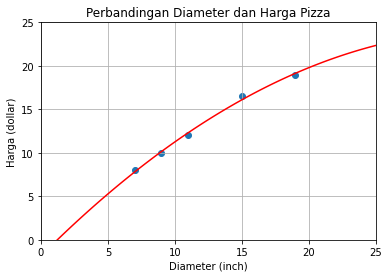

In [11]:
# Visualisasi Model

import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)          # yang akan divisualisasi
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

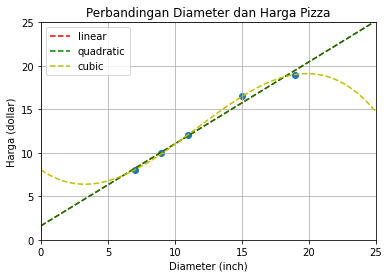

In [13]:
#Polynomial Regression: Quadratic vs Cubic

# Training set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()